# Exercise 1
Sadra Marcela Meneses           Código:201727731              
Diego Fernando López Castillo   Código:200919053

# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
pi
x=str(pi)
x


'3.141592653589793'

In [6]:
def mult_dec_pi(a, b):
    if a>=16 or b>=16:
        result = 'Error'
    else:
        x1 = int(x[a+1])
        x2 = int(x[b+1])
        result = x1*x2
    return result

In [7]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [8]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [9]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [10]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [11]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

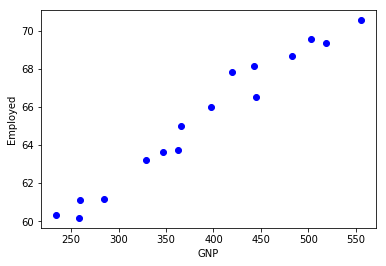

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [13]:
data.shape


(16, 3)

In [14]:
#Definición de X y Y
Y = data[:,1]
X = np.c_[np.ones(16),data[:,2]]
X

array([[   1.   ,  234.289],
       [   1.   ,  259.426],
       [   1.   ,  258.054],
       [   1.   ,  284.599],
       [   1.   ,  328.975],
       [   1.   ,  346.999],
       [   1.   ,  365.385],
       [   1.   ,  363.112],
       [   1.   ,  397.469],
       [   1.   ,  419.18 ],
       [   1.   ,  442.769],
       [   1.   ,  444.546],
       [   1.   ,  482.704],
       [   1.   ,  502.601],
       [   1.   ,  518.173],
       [   1.   ,  554.894]])

In [15]:
#Beta estimado
Beta = np.linalg.inv(X.T @ X) @ X.T @ Y
Beta

array([  5.18435898e+01,   3.47522943e-02])

In [16]:
#Predicción
#Employed=b0+b1∗GNP
Employed = Beta[0] + (Beta[1]*data[:,2])
Employed

array([ 59.98567007,  60.8592385 ,  60.81155835,  61.734058  ,
        63.27622581,  63.90260117,  64.54155685,  64.46256489,
        65.65654946,  66.41105653,  67.2308284 ,  67.29258322,
        68.61866127,  69.31012767,  69.8512904 ,  71.1274294 ])

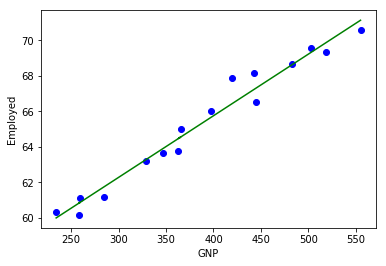

In [17]:
#Gráfico de la regresión
plt.xlabel("GNP")
plt.ylabel("Employed")
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.plot(data[:,2],Employed, 'g')

# Exercise 01.3

Analyze the baby names dataset using pandas

In [181]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [174]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [175]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [182]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

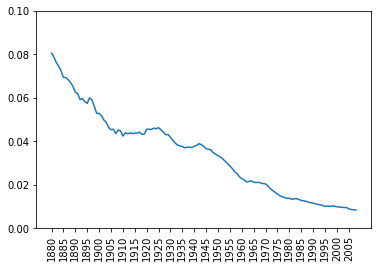

In [28]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

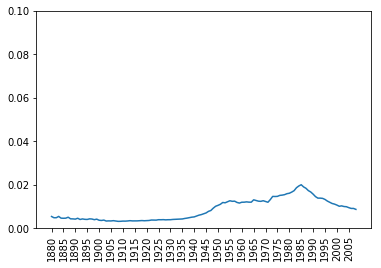

In [29]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [77]:
boys.isnull().sum()

year       0
name       0
prop       0
sex        0
soundex    0
decade     0
dtype: int64

In [98]:
#Se agrupan los años en una variable decade
boys["decade"] = 10 * (boys['year'] // 10)
# Tabla dinámica o pivot con las sumas de cada nombre por década
boys_= pd.pivot_table(boys, index='name',values="prop",columns="decade", aggfunc=np.sum)
boys_

# Se imprime el nombre más común de cada década
for x in range(1880,2005,10):
    print("En " + str(x) + " es " + boys_.loc[boys_[x].idxmax()].name)

En 1880 es John
En 1890 es John
En 1900 es John
En 1910 es John
En 1920 es Robert
En 1930 es Robert
En 1940 es James
En 1950 es James
En 1960 es Michael
En 1970 es Michael
En 1980 es Michael
En 1990 es Michael
En 2000 es Jacob


# Exercise 01.4

Which has been the most popular girl name?


In [70]:
#Se identifican inicialmente los nombres que mas se repiten
girls.name.mode()

0          Alice
1           Alma
2         Amanda
3         Amelia
4            Amy
5         Angela
6       Angelina
7          Angie
8            Ann
9           Anna
10          Anne
11         Annie
12        Audrey
13       Barbara
14       Bridget
15       Camille
16      Caroline
17       Carolyn
18     Catherine
19       Cecilia
20       Celeste
21         Celia
22     Charlotte
23     Christina
24     Christine
25        Claire
26         Clara
27       Claudia
28          Cora
29       Corinne
         ...    
85        Martha
86          Mary
87        Miriam
88         Molly
89         Nancy
90         Naomi
91       Natalie
92          Nina
93          Nora
94        Olivia
95         Paula
96     Priscilla
97        Rachel
98       Rebecca
99        Regina
100         Rosa
101         Rose
102         Ruby
103         Ruth
104         Sara
105        Sarah
106       Sophia
107        Susan
108       Sylvia
109       Teresa
110      Theresa
111     Veronica
112     Victor

In [73]:
#Se cuentan los nombres de las niñas
girls['name'].value_counts()
a = girls ["name"].value_counts()
a

Kate          129
Barbara       129
Natalie       129
Eleanor       129
Angie         129
Mary          129
Cynthia       129
Katherine     129
Ruth          129
Janet         129
Alice         129
Georgia       129
Esther        129
Isabel        129
Sarah         129
Amelia        129
Maggie        129
Camille       129
Elsa          129
Irene         129
Judith        129
Johanna       129
Cora          129
Marie         129
Angelina      129
Celeste       129
Paula         129
Sylvia        129
Kathryn       129
Amanda        129
             ... 
Achsah          1
Taina           1
Corie           1
Sloane          1
Ica             1
Georganna       1
Micayla         1
Oline           1
Julisa          1
Nealy           1
Ellis           1
Siddie          1
Beatrix         1
Kyrie           1
Gemma           1
Essa            1
Djuana          1
Lucina          1
Debera          1
Mell            1
Nira            1
Belia           1
Shirleyann      1
Dayami          1
Jazlene   

In [105]:
#Se hace una tabla dinámica
girl=pd.pivot_table(girls,index="name",values="prop",aggfunc=np.sum)
girl

#Se organizan de forma descendente
girl2=girl.sort_values(by="prop",ascending=False)
girl2

#De acuerdo con esto, el nombre Mary es el mas popular

,prop
name,
Mary,4.511860
Elizabeth,1.392100
Margaret,1.360965
Helen,1.234222
Anna,1.195867
Dorothy,1.065111
Barbara,1.001579
Patricia,0.999798
Ruth,0.942272


# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [183]:
#Se crea una base con las niñas registradas en años menores al 2000
newname = girls[girls['year'] < 2000]
newname

,year,name,prop,sex,soundex
129000,1880,Mary,0.072381,girl,M600
129001,1880,Anna,0.026678,girl,A500
129002,1880,Emma,0.020521,girl,E500
129003,1880,Elizabeth,0.019865,girl,E421
129004,1880,Minnie,0.017888,girl,M500
129005,1880,Margaret,0.016167,girl,M626
129006,1880,Ida,0.015081,girl,I300
129007,1880,Alice,0.014487,girl,A420
129008,1880,Bertha,0.013523,girl,B630
129009,1880,Sarah,0.013196,girl,S600


In [184]:
#Se separan en una base los nombres
newname2 = newname['name']
newname2

129000         Mary
129001         Anna
129002         Emma
129003    Elizabeth
129004       Minnie
129005     Margaret
129006          Ida
129007        Alice
129008       Bertha
129009        Sarah
129010        Annie
129011        Clara
129012         Ella
129013     Florence
129014         Cora
129015       Martha
129016        Laura
129017       Nellie
129018        Grace
129019       Carrie
129020        Maude
129021        Mabel
129022       Bessie
129023       Jennie
129024     Gertrude
129025        Julia
129026       Hattie
129027        Edith
129028       Mattie
129029         Rose
            ...    
248970        Abril
248971         Jill
248972        Shyla
248973       Vanesa
248974         Bryn
248975      Justina
248976      Abagail
248977      Breonna
248978      Brionna
248979       Joanne
248980     Annalise
248981       Keeley
248982      Marcela
248983        Shana
248984      Shelbie
248985       Ashlie
248986       Deasia
248987        Starr
248988        Chana


In [194]:
#Se crea una variable indicadora en la base firls. 
#Si existe un nombre antes del 2000 coloca TRUE y FALSE de lo contrario.
#Con esto se busca identificar los nomres que no existian antes del 2000
girls["ind"] = girls["name"].isin(newname2)
girls['ind'].value_counts()

True     127965
False      1035
Name: ind, dtype: int64

In [197]:
#Se separa en una base nueva los nombres que solo existen despues del 2000
girl2 = girls[girls['ind'] == False]

In [198]:
#Se hace una tabla dinámica
girl3=pd.pivot_table(girl2,index="name",values="prop",aggfunc=np.sum)
girl3

#Se organizan de forma descendente
girl4=girl3.sort_values(by="prop",ascending=False)
girl4

#De acuerdo con lo anterior el nombre nuevo más popular es "Nevaeh"

,prop
name,
Nevaeh,0.015377
Keira,0.005825
Reese,0.005638
Cadence,0.004373
Janiya,0.002853
Ximena,0.002745
Ainsley,0.002692
Amya,0.002649
Kaydence,0.002447
